Yue write this code at 2023/08/02

The aim is to plot the data relevant the cogging force and show it.



In [2]:
import odrive
from odrive.enums import *
import time
import math
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt
from IPython.display import clear_output
import numpy as np
import serial
import pickle
import os


def lowpass_filter(data,cutoff,fs,order):
    b,a=butter(order,2*cutoff/fs,btype='low',analog=False)
    y=filtfilt(b,a,data)
    return y 

# cogging force test


In [13]:
#test_data=[valid_time,valid_tor,valid_pos]
all_sped=[-3,-15,-22,9,13]
all_color=['cadetblue','darkturquoise','cyan','coral','orangered']
# all_sped=[9,13]
# all_sped=[13,-15]
all_data=[]
for speed in all_sped:
    filepath='./test/fixed_input_at_0A_with_{}speed.pkl'.format(speed)
    test_data=pickle.load(open(filepath,'rb'))
    all_data.append(test_data)
print(len(all_data))
print(len(all_data[0]))

5
3


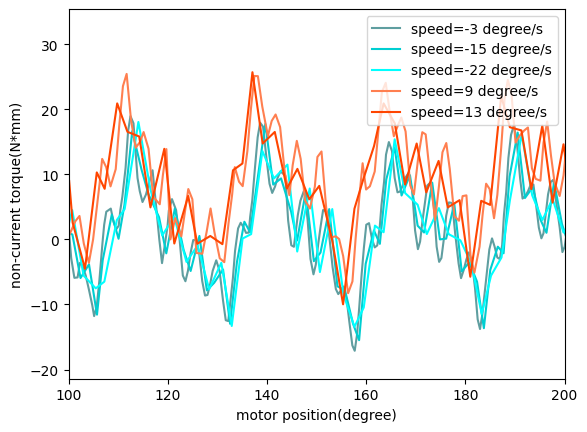

In [14]:
for i in range(len(all_data)):
    time,tor,pos=all_data[i]
    fs=len(time)/40
    filtered_tor=lowpass_filter(tor,3,fs,4)
    plt.plot(pos,tor,all_color[i],label='speed={} degree/s'.format(all_sped[i]))
    zero_point_pos=[]
    zero_point_tor=[]
    for j in range(len(time)):
        if abs(tor[j])<0.1:
            zero_point_pos.append(pos[j])
            zero_point_tor.append(tor[j])
    # plt.scatter(zero_point_pos,zero_point_tor)
    # print(zero_point_pos)

plt.legend()
plt.xlabel('motor position(degree)')
plt.ylabel('non-current torque(N*mm)')
plt.xlim(100,200)
plt.show()
#positive means the resistant to the omega motion 

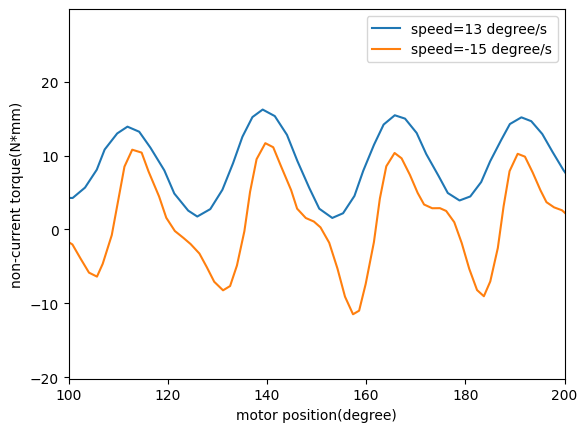

In [7]:
for i in range(len(all_data)):
    time,tor,pos=all_data[i]
    fs=len(time)/50
    filtered_tor=lowpass_filter(tor,3,fs,4)
    plt.plot(pos,filtered_tor,label='speed={} degree/s'.format(all_sped[i]))
    
plt.legend()
plt.xlabel('motor position(degree)')
plt.ylabel('non-current torque(N*mm)')
plt.xlim(100,200)
plt.show()

# impedance control test


In [46]:
all_pos_k=[[160,1],[150,1],[150,3]]

all_data=[]
for pos,k in all_pos_k:
    filepath='./test/impedance_control_at_{}degree_with_k={}.pkl'.format(pos,k)
    if os.path.exists(filepath):
        print(filepath)
        test_data=pickle.load(open(filepath,'rb'))
        all_data.append(test_data)
print(len(all_data))

./test/impedance_control_at_160degree_with_k=1.pkl
./test/impedance_control_at_150degree_with_k=1.pkl
./test/impedance_control_at_150degree_with_k=3.pkl
3


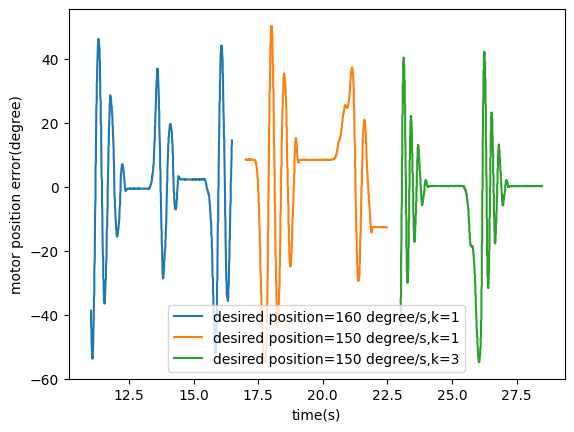

In [47]:
for i in range(3):
    time,pos,inp=all_data[i]
    error=[]
    valid_time=[]
    valid_error=[]
    for j in range(len(time)):
        error.append(pos[j]-all_pos_k[i][0])
    for j in range(len(time)):
        if time[j]>11 and time[j]<16.5:
            valid_time.append(time[j]+6*i)
            valid_error.append(error[j])
    

    plt.plot(valid_time,valid_error,label='desired position={} degree/s,k={}'.format(all_pos_k[i][0],all_pos_k[i][1]))



plt.legend()
plt.xlabel('time(s)')
plt.ylabel('motor position error(degree)')
# plt.xlim(10,20)
plt.show()

# dynamics torque generation at different current

In [3]:
#test_data=[valid_time,valid_tor,valid_pos]
all_cur=[0,50,100]
# all_color=['cadetblue','darkturquoise','cyan','coral','orangered']
# all_sped=[9,13]
# all_sped=[13,-15]
all_data=[]
for cur in all_cur:
    filepath='./test/fixed_input_at_{}A_with_7speed.pkl'.format(cur)
    test_data=pickle.load(open(filepath,'rb'))
    all_data.append(test_data)
print(len(all_data))
print(len(all_data[0]))

3
3


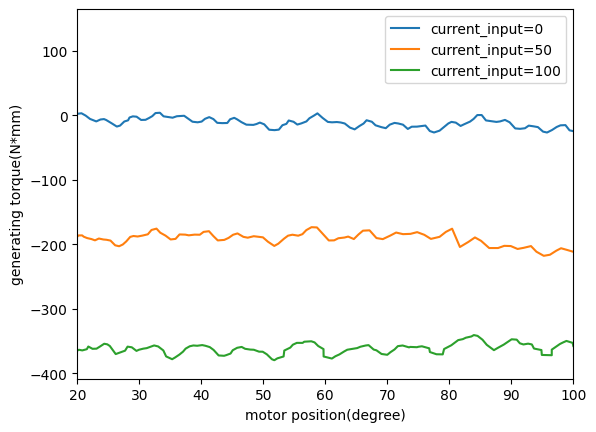

In [7]:
GRAV=0.18#the max gravity impact of load cell(N)
ARM=44#unit:mm
VER_POS=112#position of motor when the load cell was vertical(degree)
for i in range(len(all_data)):
    time,tor,pos=all_data[i]
    # fs=len(time)/40
    # filtered_tor=lowpass_filter(tor,3,fs,4)
    # if all_cur[i]!=0:
    #     for j in range(len(time)):
    #         grav_angle=(-VER_POS+pos[j])*math.pi/180
    #         tor[j]=tor[j]-math.sin(grav_angle)*GRAV*ARM
    #         tor[j]=-tor[j]
    plt.plot(pos,tor,label='current_input={}'.format(all_cur[i]))


plt.legend()
plt.xlabel('motor position(degree)')
plt.ylabel('generating torque(N*mm)')
plt.xlim(20,100)
plt.show()
#positive means the resistant to the omega motion 